In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0, ResNet50, MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

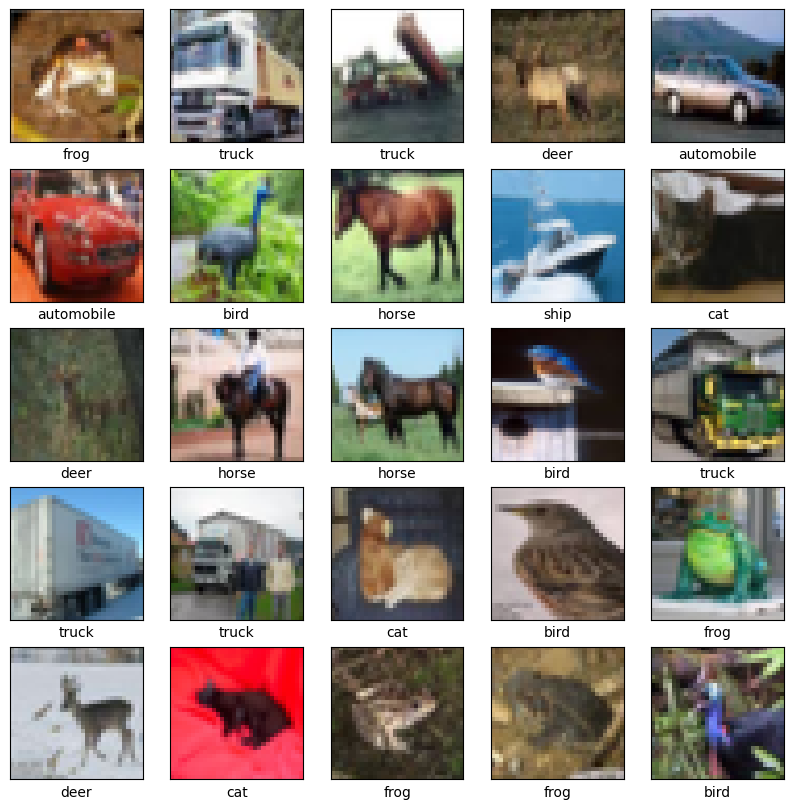

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


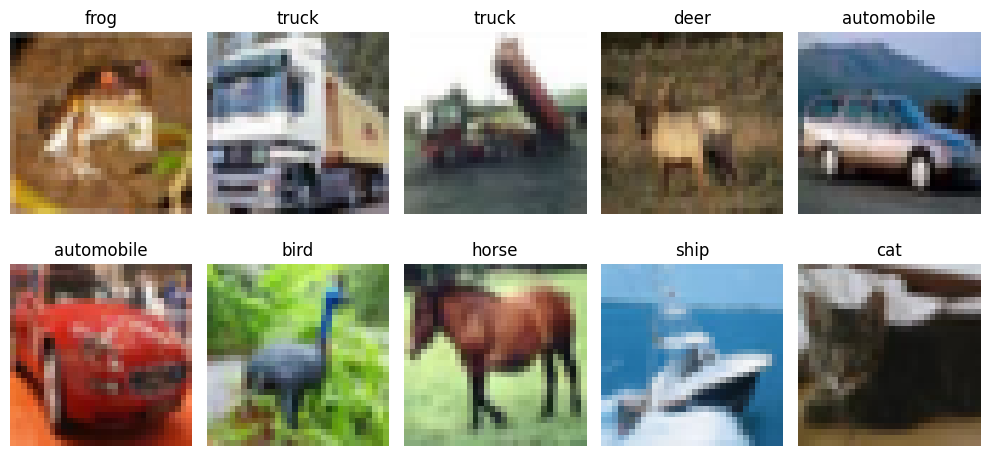

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def create_cnn_model():
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10))

    return model

model = create_cnn_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2301 - loss: 2.0326 - val_accuracy: 0.4965 - val_loss: 1.3934
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4680 - loss: 1.4704 - val_accuracy: 0.5438 - val_loss: 1.2570
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5351 - loss: 1.2932 - val_accuracy: 0.6064 - val_loss: 1.1148
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5735 - loss: 1.2091 - val_accuracy: 0.6199 - val_loss: 1.0931
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6058 - loss: 1.1194 - val_accuracy: 0.6266 - val_loss: 1.0872
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6299 - loss: 1.0628 - val_accuracy: 0.6567 - val_loss: 0.9807
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6493 - loss: 1.0085 - val_accuracy: 0.6678 - val_loss: 0.9697
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6660 - loss: 0.9643 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 0s - 2ms/step - accuracy: 0.6766 - loss: 0.9510

Test accuracy: 0.6765999794006348


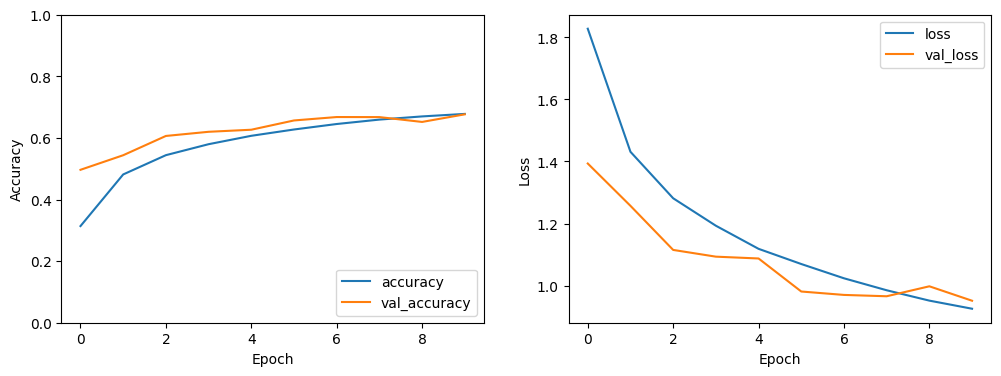

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


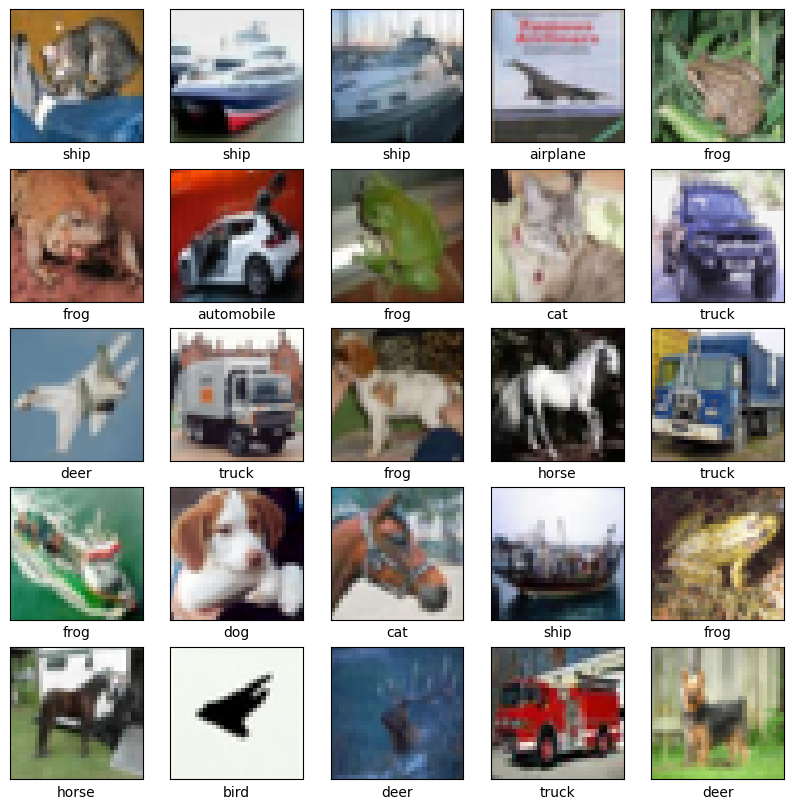

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[predictions[i].argmax()])
plt.show()


In [ ]:
num_classes = 10

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3),
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
cnn_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train_cat, epochs=20, batch_size=64, validation_data=(x_test, y_test_cat))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.2647 - loss: 2.1839 - val_accuracy: 0.4248 - val_loss: 1.6107
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4733 - loss: 1.4904 - val_accuracy: 0.5617 - val_loss: 1.3039
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5799 - loss: 1.2182 - val_accuracy: 0.6292 - val_loss: 1.1093
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6432 - loss: 1.0557 - val_accuracy: 0.6947 - val_loss: 0.9565
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6868 - loss: 0.9287 - val_accuracy: 0.7146 - val_loss: 0.8845
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7205 - loss: 0.8260 - val_accuracy: 0.7023 - val_loss: 0.9057
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7534 - loss: 0.7410 - val_accuracy: 0.7052 - val_loss: 0.8838
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7822 - loss: 0.6614 - val_accura

In [ ]:
cnn_loss, cnn_acc = cnn_model.evaluate(x_test, y_test_cat)
cnn_report = classification_report(y_test, cnn_model.predict(x_test).argmax(axis=1), target_names=class_names, output_dict=True)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7719 - loss: 0.8741
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
resnet_base.trainable = True

resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

resnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_data=(x_test, y_test_cat))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 83ms/step - accuracy: 0.1877 - loss: 2.6993 - val_accuracy: 0.2231 - val_loss: 2.3868
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.5807 - loss: 1.2873 - val_accuracy: 0.6916 - val_loss: 0.9690
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.7144 - loss: 0.9152 - val_accuracy: 0.7478 - val_loss: 0.7751
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.7749 - loss: 0.7412 - val_accuracy: 0.7828 - val_loss: 0.6728
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8201 - loss: 0.5939 - val_accuracy: 0.7913 - val_loss: 0.6805
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8370 - loss: 0.5286 - val_accuracy: 0.7878 - val_loss: 0.6815
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8600 - loss: 0.4566 - val_accuracy: 0.7971 - val_loss: 0.6727
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━

In [ ]:
resnet_loss, resnet_acc = resnet_model.evaluate(x_test, y_test_cat)
resnet_report = classification_report(y_test, resnet_model.predict(x_test).argmax(axis=1), target_names=class_names, output_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8148 - loss: 0.8419
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step


In [ ]:
mobilenet_base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
mobilenet_base.trainable = True

mobilenet_model = Sequential([
    mobilenet_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_data=(x_test, y_test_cat))

<ipython-input-17-51489a5bcbcd>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.1415 - loss: 2.6619 - val_accuracy: 0.1561 - val_loss: 2.2572
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.3589 - loss: 1.8246 - val_accuracy: 0.3420 - val_loss: 1.9060
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5167 - loss: 1.4286 - val_accuracy: 0.5469 - val_loss: 1.3737
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.6004 - loss: 1.2246 - val_accuracy: 0.6324 - val_loss: 1.1122
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.6488 - loss: 1.0772 - val_accuracy: 0.6922 - val_loss: 0.9414
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.6864 - loss: 0.9660 - val_accuracy: 0.7230 - val_loss: 0.8397
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7234 - loss: 0.8567 - val_accuracy: 0.7353 - val_loss: 0.7956
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
mobilenet_loss, mobilenet_acc = mobilenet_model.evaluate(x_test, y_test_cat)
mobilenet_report = classification_report(y_test, mobilenet_model.predict(x_test).argmax(axis=1), target_names=class_names, output_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7729 - loss: 0.8080
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


In [ ]:
results_df = pd.DataFrame({
    'Model': ['Custom CNN' , 'ResNet50', 'MobileNetV2'],
    'Accuracy': [cnn_acc, resnet_acc, mobilenet_acc],
    'Precision': [
        cnn_report['weighted avg']['precision'],
        resnet_report['weighted avg']['precision'],
        mobilenet_report['weighted avg']['precision']
    ],
    'Recall': [
        cnn_report['weighted avg']['recall'],
        resnet_report['weighted avg']['recall'],
        mobilenet_report['weighted avg']['recall']
    ],
    'F1-Score': [
        cnn_report['weighted avg']['f1-score'],
        resnet_report['weighted avg']['f1-score'],
        mobilenet_report['weighted avg']['f1-score']
    ]
})

In [ ]:
print(results_df)

         Model  Accuracy  Precision  Recall  F1-Score
0   Custom CNN    0.7653   0.777177  0.7653  0.767359
1     ResNet50    0.8141   0.815260  0.8141  0.813507
2  MobileNetV2    0.7775   0.785662  0.7775  0.775644


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.1
